# Statistical Analysis

## 1. Descriptive Statistical Analysis

In [89]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])


# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Import the visualization package, seaborn:
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('Amostra_STATA_R1.csv')

In [3]:
df.head(5)

,Years,Over_stay,Invest,Expend_Leis,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
0,2004,325.6,27.2,28.7,17.5,49.1,152.2,11.0
1,2005,338.2,23.6,25.5,19.8,31.4,158.6,11.4
2,2006,357.0,28.6,29.8,19.0,39.4,166.3,12.3
3,2007,376.9,31.8,25.4,18.6,68.3,175.5,13.4
4,2008,371.5,36.8,36.2,31.6,70.3,179.1,13.8


In [4]:
print(df.columns)

Index(['Years', 'Over_stay', 'Invest', 'Expend_Leis', 'Expend_Visit',
       'Expend_Busin', 'GDP', 'Disemb_Pass'],
      dtype='object')


In [5]:
print(df.dtypes)

Years             int64
Over_stay       float64
Invest          float64
Expend_Leis     float64
Expend_Visit    float64
Expend_Busin    float64
GDP             float64
Disemb_Pass     float64
dtype: object


In [6]:
df.describe()
# This shows the statistical summary of all numeric-typed (int, float) columns.

,Years,Over_stay,Invest,Expend_Leis,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2012.000000,436.100000,26.841176,31.182353,22.635294,45.988235,179.794118,17.041176
std,5.049752,129.351696,5.938546,7.122871,5.379700,20.456077,16.331850,6.219934
min,2004.000000,250.500000,18.500000,23.900000,16.500000,18.800000,152.200000,9.100000
25%,2008.000000,353.600000,23.200000,25.500000,18.700000,32.500000,170.500000,13.400000
50%,2012.000000,376.900000,26.000000,29.100000,20.100000,39.900000,176.100000,15.200000
75%,2016.000000,512.400000,28.600000,35.700000,27.000000,49.600000,186.500000,19.700000
max,2020.000000,682.100000,40.600000,52.100000,33.500000,99.900000,214.400000,30.000000


In [7]:
df[['GDP','Over_stay']].describe()

,GDP,Over_stay
count,17.000000,17.000000
mean,179.794118,436.100000
std,16.331850,129.351696
min,152.200000,250.500000
25%,170.500000,353.600000
50%,176.100000,376.900000
75%,186.500000,512.400000
max,214.400000,682.100000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Years         17 non-null     int64  
 1   Over_stay     17 non-null     float64
 2   Invest        17 non-null     float64
 3   Expend_Leis   17 non-null     float64
 4   Expend_Visit  17 non-null     float64
 5   Expend_Busin  17 non-null     float64
 6   GDP           17 non-null     float64
 7   Disemb_Pass   17 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.1 KB


In [9]:
#We use the following functions to identify these missing values.

missing_data = df.isnull()
missing_data.head(5)

,Years,Over_stay,Invest,Expend_Leis,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [10]:
#Count missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Years
False    17
Name: Years, dtype: int64

Over_stay
False    17
Name: Over_stay, dtype: int64

Invest
False    17
Name: Invest, dtype: int64

Expend_Leis
False    17
Name: Expend_Leis, dtype: int64

Expend_Visit
False    17
Name: Expend_Visit, dtype: int64

Expend_Busin
False    17
Name: Expend_Busin, dtype: int64

GDP
False    17
Name: GDP, dtype: int64

Disemb_Pass
False    17
Name: Disemb_Pass, dtype: int64



In [11]:
#Calculate the mean value for the "GDP" column 

avg_pib = df["GDP"].astype("float").mean(axis=0)

print("GDP Average:", avg_pib)

GDP Average: 179.79411764705878


In [48]:
#To see which values are present in a particular column, we can use the ".value_counts()" method:

df['Disemb_Pass'].value_counts()

13.4    2
11.0    1
11.4    1
12.3    1
13.8    1
14.2    1
15.2    1
15.4    1
16.2    1
17.7    1
19.7    1
22.5    1
26.3    1
28.1    1
30.0    1
9.1     1
Name: Disemb_Pass, dtype: int64

In [46]:
df['Disemb_Pass'].value_counts().to_frame()

,Disemb_Pass
13.4,2
11.0,1
11.4,1
12.3,1
13.8,1
14.2,1
15.2,1
15.4,1
16.2,1
17.7,1


In [49]:
# engine-location as variable
GDP_counts = df['GDP'].value_counts().to_frame()
GDP_counts.rename(columns={'GDP': 'value_counts'}, inplace=True)
GDP_counts.index.name = 'GDP'
GDP_counts.head(10)

,value_counts
GDP,
152.2,1
170.5,1
214.4,1
205.2,1
195.9,1
186.5,1
179.7,1
173.1,1
168.3,1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

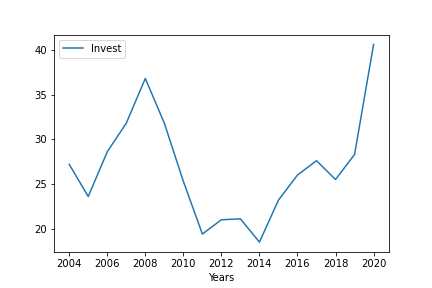

<Figure size 432x288 with 0 Axes>

In [14]:
df.plot(x="Years", y=["Invest"])

plt.show()

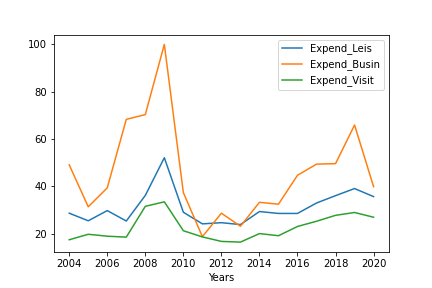

<Figure size 432x288 with 0 Axes>

In [15]:
df.plot(x="Years", y=["Expend_Leis","Expend_Busin","Expend_Visit"])

plt.show()

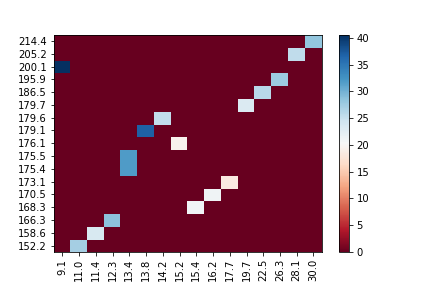

<Figure size 432x288 with 0 Axes>

In [64]:
# Let's use a heat map to visualize the relationship between GDP, Disembarked Passangers and Investment rate.


# grouping results

df_gptest = df[['GDP','Disemb_Pass','Invest']]
grouped_test1 = df_gptest.groupby(['GDP','Disemb_Pass'],as_index=False).mean()
grouped_test1

grouped_pivot = grouped_test1.pivot(index='GDP',columns='Disemb_Pass')
grouped_pivot

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot



#use the grouped results

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 2. Correlation and Causation

In [16]:
df.corr()

,Years,Over_stay,Invest,Expend_Leis,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
Years,1.000000,0.620040,0.040849,0.219635,0.334055,-0.105157,0.858703,0.668596
Over_stay,0.620040,1.000000,-0.260690,0.145144,0.249059,0.084330,0.658817,0.989478
Invest,0.040849,-0.260690,1.000000,0.546538,0.630809,0.619101,0.316990,-0.247122
Expend_Leis,0.219635,0.145144,0.546538,1.000000,0.904858,0.817394,0.440670,0.188432
Expend_Visit,0.334055,0.249059,0.630809,0.904858,1.000000,0.754189,0.609300,0.294080
Expend_Busin,-0.105157,0.084330,0.619101,0.817394,0.754189,1.000000,0.236648,0.091881
GDP,0.858703,0.658817,0.316990,0.440670,0.609300,0.236648,1.000000,0.718245
Disemb_Pass,0.668596,0.989478,-0.247122,0.188432,0.294080,0.091881,0.718245,1.000000


### Multicollinearity:

- overnight stay and passengers disembarked (99.0%);
- leisure expenditure and visits expenditure (90.5%).

In [66]:
pearson_coef, p_value = stats.pearsonr(df['GDP'], df['Invest'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.31698958107538433  with a P-value of P = 0.215083106037649


In [67]:
pearson_coef, p_value = stats.pearsonr(df['Disemb_Pass'], df['Invest'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.24712247261945924  with a P-value of P = 0.3389476904024355


## 3. Multiple Linear Regression

### 3.1 MLR Analysis

In [17]:
# Let's load the modules for linear regression:

from sklearn.linear_model import LinearRegression

# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [18]:
Z = df[['GDP', 'Over_stay', 'Expend_Leis', 'Expend_Visit', 'Expend_Busin', 'Disemb_Pass']]

In [19]:
lm.fit(Z, df['Invest'])

LinearRegression()

In [20]:
# What is the value of the intercept(a)?

lm.intercept_

-33.558228766409925

In [21]:
# What are the values of the coefficients (b1, b2, b3, b4)?

lm.coef_

array([ 0.35522056,  0.08199464, -0.28303107,  0.35307506,  0.15396531,
       -2.66836038])


#### Given the coefficients of the variables, we've decided to remove overnight stay and leisure expenses.


In [22]:
df[['Expend_Visit','Expend_Busin','GDP', 'Disemb_Pass']].corr()

,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
Expend_Visit,1.000000,0.754189,0.609300,0.294080
Expend_Busin,0.754189,1.000000,0.236648,0.091881
GDP,0.609300,0.236648,1.000000,0.718245
Disemb_Pass,0.294080,0.091881,0.718245,1.000000


#### Finally we have a better adjustment of the regression model.

In [23]:
df[['Invest','Expend_Visit','Expend_Busin','GDP', 'Disemb_Pass']].corr()

,Invest,Expend_Visit,Expend_Busin,GDP,Disemb_Pass
Invest,1.000000,0.630809,0.619101,0.316990,-0.247122
Expend_Visit,0.630809,1.000000,0.754189,0.609300,0.294080
Expend_Busin,0.619101,0.754189,1.000000,0.236648,0.091881
GDP,0.316990,0.609300,0.236648,1.000000,0.718245
Disemb_Pass,-0.247122,0.294080,0.091881,0.718245,1.000000


### Final Econometric Model

In [24]:
Z = df[['GDP', 'Expend_Visit', 'Expend_Busin', 'Disemb_Pass']]

In [25]:
lm.fit(Z, df['Invest'])

LinearRegression()

In [26]:
#fit multiple linear regression model
model = ols('Invest ~ Expend_Busin + Expend_Visit + GDP + Disemb_Pass', data=df).fit()

#view model summary
print(model.summary())

/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                 Invest   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     12.06
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           0.000363
Time:                        09:22:16   Log-Likelihood:                -40.177
No. Observations:                  17   AIC:                             90.35
Df Residuals:                      12   BIC:                             94.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.2188     11.567     -1.748   

In [27]:
lm.score(Z, df['Invest'])

0.8008140530119776

In [28]:
print('The R-square is: ', lm.score(Z, df['Invest']))

The R-square is:  0.8008140530119776


#### Conclusion:

Since the p-value of GDP and Disemb_Pass is < 0.01 for a significance level of 1%, the correlation between GDP, Disemb_Pass and Invest is statistically significant, and the linear relationship is moderate.

In [29]:
#We can output a prediction:

Yhat=lm.predict(Z)

print("The predicted investment rate for the years 2004 to 2020 is", Yhat[0:17].round(2))

The predicted investment rate for the years 2004 to 2020 is [24.   23.09 25.8  31.81 33.01 36.5  27.97 23.34 22.19 21.38 22.38 22.55
 24.03 24.34 25.69 29.22 39.01]


### Multiple linear regression model:

invest = Bo + B1(Expend_Visit) + B2(Expend_Busin) + B3(GDP) + B4(Disemb_Pass) + Er

- Bo: constant of the equation;
- Er: statistical error of the equation.

In [31]:
# What is the value of the intercept(a)?

lm.intercept_

-20.218797371981694

In [32]:
# What is the value of the intercept(a)?

lm.intercept_

-20.218797371981694

In [33]:
# What are the values of the coefficients (b1, b2, b3, b4)?

lm.coef_

array([ 0.30471446,  0.01188053,  0.14374591, -0.85706718])

#### RLM Expression:

invest = -20.2188 + 0.3047145* gdp - 0.8570672* Disemb_Pass  + 0.0118805* Expend_Visit + 0.1437459* Expend_Busin


## 2.2 RLM Evaluation

In [34]:
#Let's calculate the Pearson Correlation Coefficient and P-value of the Independent Variables.

from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['GDP'], df['Invest'])


In [35]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.31698958107538433  with a P-value of P = 0.215083106037649


In [ ]:
#Let's calculate the MSE.
    
mse = mean_squared_error(df['Invest'], Yhat)

print('The mean square error of Invest and predicted value using multifit is: ', \
      mean_squared_error(df['Invest'], Yhat))

The mean square error of Invest and predicted value using multifit is:  6.611346869639398


The Mean Squared Error (MSE) measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

In [36]:
#Import visualization packages "Matplotlib" and "Seaborn"

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 41.769603081328086)

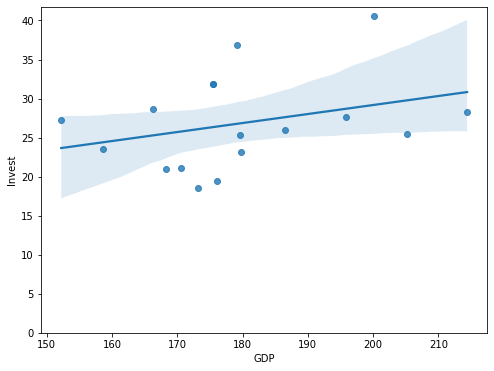

In [43]:
#2. Model Evaluation Using Visualization

#Import the visualization package, seaborn:

import seaborn as sns
%matplotlib inline

#Let's visualize GDP as potential predictor variable of price:

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="GDP", y="Invest", data=df)
plt.ylim(0,)

As the GDP goes up, the Investment rate goes up: this indicates a positive direct correlation between these two variables. 
#### GDP size seems like a pretty good predictor of investment since the regression line is a diagonal line.

(0.0, 42.03150620888428)

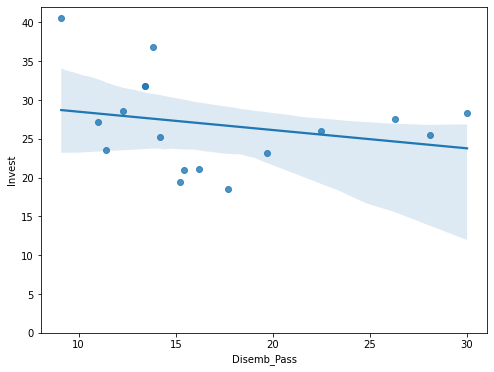

In [68]:
#Let's visualize Disembarked Passengers as potential predictor variable of price:

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Disemb_Pass", y="Invest", data=df)
plt.ylim(0,)

We can see from this plot that Investment rate is negatively correlated to Disembarked Passengers, since the regression slope is negative.

eval_env: 1


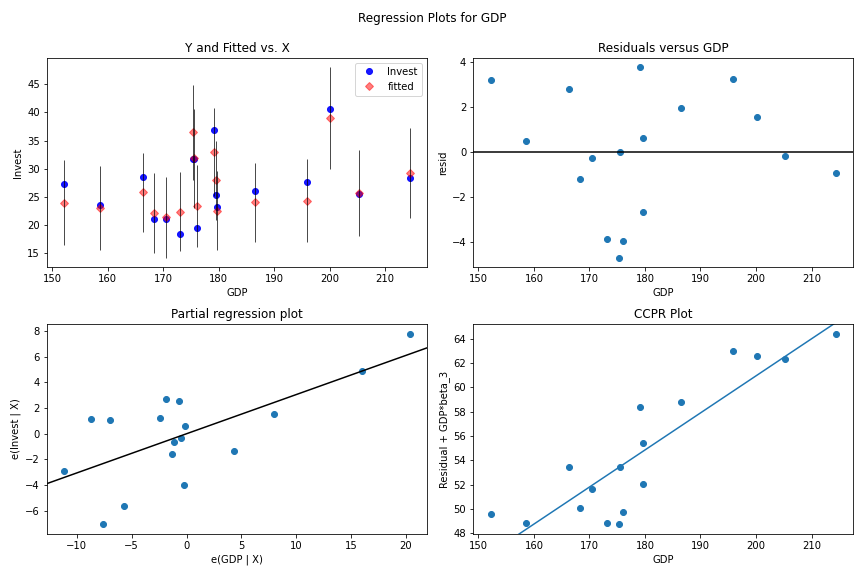

<Figure size 864x576 with 0 Axes>

In [70]:
# Create residual vs. predictor plot for 'GDP'

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'GDP', fig=fig)

plt.show()

In [42]:
df[["GDP", "Invest"]].corr()

,GDP,Invest
GDP,1.00000,0.31699
Invest,0.31699,1.00000


In [44]:
df[["Disemb_Pass", "Invest"]].corr()

,Disemb_Pass,Invest
Disemb_Pass,1.000000,-0.247122
Invest,-0.247122,1.000000


/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


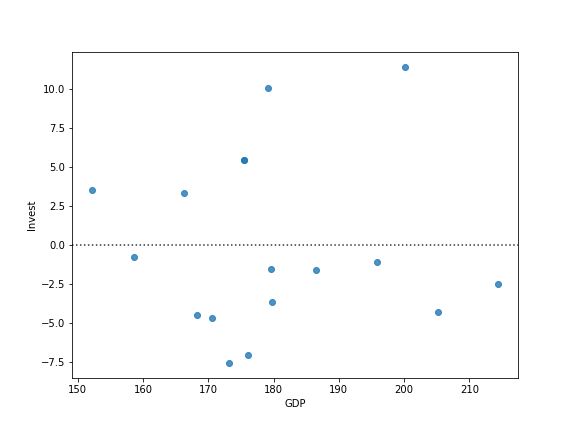

<Figure size 576x432 with 0 Axes>

In [38]:
#Residual plot

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(df['GDP'], df['Invest'])
plt.show()

We can see from this residual plot that the residuals are randomly spread around the x-axis, leading us to believe that the RLM model is appropriate


## 2.3 RLM distribution plot

/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


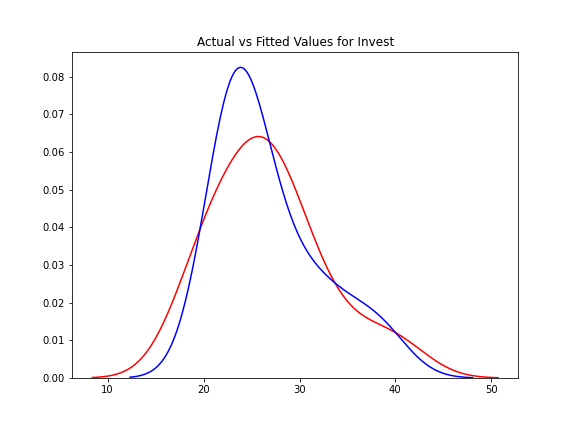

In [39]:
# Multiple Linear Regression¶ visualization:

# One way to look at the fit of the model is by looking at the distribution plot. 
# We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.


Yhat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Invest'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Invest')
plt.xlabel('')
plt.ylabel('')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 